# Problem set 1
## Malik (Mukhamejan Assan)
### 19 January, 2023

In [19]:
# initialize Python

import numpy as np
import pandas as pd
import seaborn as sns
# from datetime import datetime
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from scipy.stats import norm
# from IPython.core.display import HTML
# from stargazer.stargazer import Stargazer
# import statsmodels.nonparametric.kernel_regression as loess

In [4]:
# access data
data = pd.read_csv('https://osf.io/download/4ay9x/')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### The dataset

In [7]:
# quick peak into the dataset
data.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work


In [8]:
# there are some 23 columns, and some are completely redundant for the following analysis
data.keys()

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94'],
      dtype='object')

#### Features engineering

ID variables 	

	-	`hhid` - houeshold id

important vars	

 	-	`age` - age
	-	`sex` - gender
	-	`earnwke` - weakly earnings
	-	`uhourse` - usual work hours
	-	`occ2012` - occupational code (census 2010 classification)
	-	`grade92` - highest educational grade completed	

In [38]:
# print(
#     round(
#         len(fin_mngrs['hhid'].unique())/len(fin_mngrs)*100
#         ), 
#         '%% of the data comes from the people from different households. I will keep only observation with unique `hhid`.')

98 %% of the data comes from the people from different households. I will keep only observation with unique `hhid`.


In [9]:
# dropping duplicates of `hhid`
data.drop_duplicates(subset=['hhid'], inplace=True)
data.drop(columns=['Unnamed: 0', 'intmonth', 'stfips', 'weight',
       'ethnic', 'marital', 'ownchild', 'chldpres', 'prcitshp', 'ind02',
       'class', 'unionmme', 'unioncov', 'lfsr94']) 

,Unnamed: 0,hhid,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,occ2012
count,149316.000000,1.493160e+05,149316.000000,149316.000000,149316.000000,149316.000000,149316.000000,20071.000000,149316.000000,149316.000000,149316.000000,149316.000000,149316.000000,149316.000000
mean,158796.895095,4.510656e+14,2375.618819,888.834343,38.939819,40.807958,1.424456,2.549250,40.706810,1.493839,3.461250,0.643729,1.770935,4161.185640
std,91294.406095,3.227225e+14,1295.345801,643.737322,10.259280,2.502888,1.333825,2.382705,12.776095,0.499964,2.740185,1.022607,3.075455,2570.644535
min,3.000000,5.893210e+09,53.232500,0.010000,1.000000,31.000000,1.000000,1.000000,16.000000,1.000000,1.000000,0.000000,0.000000,10.000000
25%,79751.500000,1.368508e+14,1271.730300,430.000000,40.000000,39.000000,1.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,2200.000000
50%,158971.500000,4.114799e+14,2662.681950,719.600000,40.000000,40.000000,1.000000,1.000000,41.000000,1.000000,1.000000,0.000000,0.000000,4220.000000
75%,237719.250000,7.340299e+14,3319.093575,1153.840000,40.000000,43.000000,1.000000,4.000000,52.000000,2.000000,7.000000,1.000000,3.000000,5700.000000
max,317056.000000,9.999907e+14,24595.832400,2884.610000,99.000000,46.000000,26.000000,8.000000,64.000000,2.000000,7.000000,10.000000,15.000000,9750.000000


In [17]:
fin_mngrs = data[data['occ2012'] == 120]
fin_mngrs.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
15,32,731019430119001,January,AL,3862.8767,1019.23,40,41,2,NaN,...,0,0,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",120,"Private, For Profit",No,No,Employed-At Work
123,270,921899830559007,January,AL,2892.7761,629.60,40,40,1,NaN,...,3,11,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",120,"Private, For Profit",No,No,Employed-At Work
422,942,785509730019006,January,AR,1783.3996,961.53,45,43,1,NaN,...,0,0,"Native, Born In US",71,"Banking and related activities (521, 52211,52219)",120,"Private, For Profit",No,Yes,Employed-At Work
633,1417,92957701084698,January,CA,3544.3911,2788.46,60,44,1,NaN,...,1,1,"Foreign Born, US Cit By Naturalization",93,Computer systems design and related services (...,120,"Private, For Profit",No,No,Employed-At Work
703,1585,260755057903294,January,CA,3862.7813,1538.46,40,44,4,NaN,...,1,1,"Foreign Born, Not a US Citizen",93,Non-depository credit and related activities (...,120,"Private, For Profit",No,No,Employed-At Work


In [40]:
fin_mngrs.describe()

,Unnamed: 0,hhid,weight,earnwke,uhours,grade92,race,ethnic,age,sex,marital,ownchild,chldpres,occ2012
count,1401.000000,1.401000e+03,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,129.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.0
mean,155081.858672,4.310620e+14,2338.850700,1449.602984,43.483226,42.094932,1.329051,3.038760,43.750892,1.566024,2.687366,0.746610,2.078515,120.0
std,90117.632860,3.159658e+14,1274.784592,744.818125,7.433892,1.818236,1.079453,2.596281,10.961689,0.495799,2.481513,1.025756,3.208623,0.0
min,32.000000,2.370603e+10,203.934000,0.030000,10.000000,34.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000,0.000000,120.0
25%,75489.000000,1.204641e+14,1209.166500,865.000000,40.000000,40.000000,1.000000,1.000000,35.000000,1.000000,1.000000,0.000000,0.000000,120.0
50%,153045.000000,4.016130e+14,2708.352700,1259.610000,40.000000,43.000000,1.000000,2.000000,44.000000,2.000000,1.000000,0.000000,0.000000,120.0
75%,232694.000000,7.059046e+14,3284.917400,1923.070000,45.000000,43.000000,1.000000,6.000000,53.000000,2.000000,5.000000,1.000000,3.000000,120.0
max,316936.000000,9.987995e+14,8930.343700,2884.610000,80.000000,46.000000,19.000000,8.000000,64.000000,2.000000,7.000000,5.000000,14.000000,120.0


#### Tasks
Build four predictive models using linear regression for earnings per hour. 
1. Models: the target variable is earnings per hour, all others would be predictors.
2. Model 1 shall be the simplest, model 4 the more complex. It shall be OLS. You shall explain your choice of predictors.
3. Compare model performance of these models (a) RMSE in the full sample, (2) cross-validated RMSE and (c) BIC in the full sample. 
4. Discuss the relationship between model complexity and performance. You may use visual aids. 
5. You should submit your code in Github and 1 page report in pdf on Moodle. 


#### Task 1. EDA for data cleaning 

<AxesSubplot:>

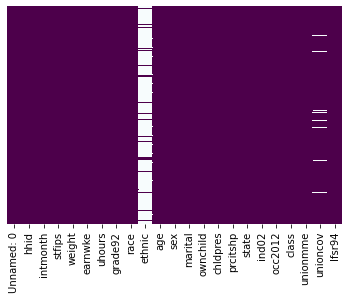

In [24]:

# Checking for missing values. White lines are missing observations
sns.heatmap(fin_mngrs.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')
# `ethnic` is mostly missing, `unioncov` is missing some observations

In [20]:
fin_mngrs.isnull()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
15,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
123,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
422,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
633,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
703,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149065,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
149090,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
149167,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
149224,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
